In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop(['Unnamed: 0'],axis = 1,inplace=True)

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

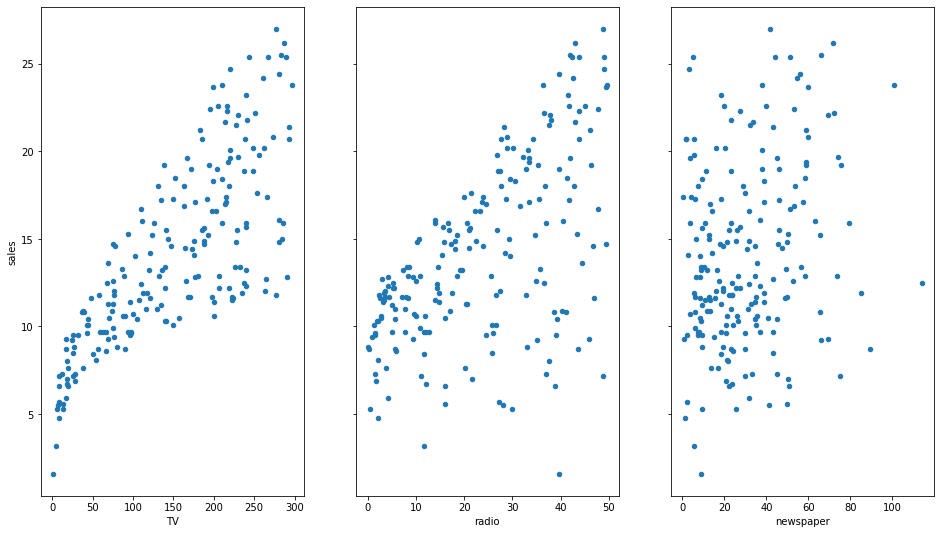

In [5]:
fig,axes = plt.subplots(1,3,sharey=True)
df.plot(kind = 'scatter', x = 'TV', y='sales',ax = axes[0],figsize = (16,9))
df.plot(kind = 'scatter', x = 'radio', y='sales',ax = axes[1])
df.plot(kind = 'scatter', x = 'newspaper', y='sales',ax = axes[2])

In [7]:
# Define the feature and tanget
feature = df[['TV']]
target = df[['sales']]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature, target)

In [9]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()

In [10]:
my_model.fit(x_train,y_train)

LinearRegression()

In [17]:
new = pd.DataFrame({'TV' : [df.TV.min(),df.TV.max()]})
new

,TV
0,0.7
1,296.4


In [20]:
predict = my_model.predict(new)

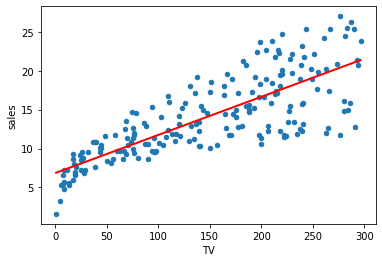

In [24]:
df.plot(kind = 'scatter',x ='TV',y ='sales')
plt.plot(new,predict,c = 'red',linewidth = 2)

In [29]:
# p-values methods
import statsmodels.formula.api as smf
lm = smf.ols(formula ='sales ~ TV', data = df).fit()

In [30]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [31]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [32]:
lm.rsquared

0.611875050850071